In [1]:
import json
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from utils.plot import degree_distribution_comparison_plot, female_degree_fraction_plot, stacked_degree_fraction_over_year, mixed_edges_over_year 
from utils.transformation import build_student_mentor_graph

In [2]:
with open('name_gender_map.json', 'r') as file:
    name_gender_map = json.load(file)

In [3]:
edge_list = pd.read_csv('edge_list_filtered.csv')

In [4]:
g = nx.from_pandas_edgelist(edge_list)
nx.set_node_attributes(g, name_gender_map, 'gender')

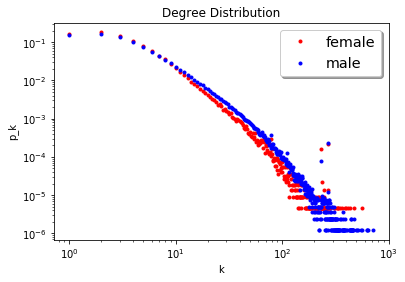

In [5]:
degree_distribution_comparison_plot(g)

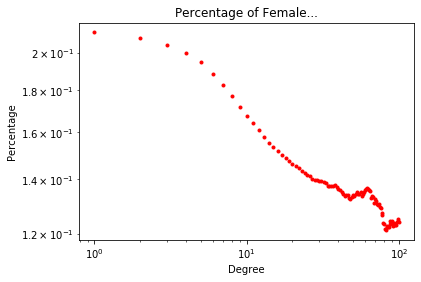

In [6]:
female_degree_fraction_plot(g, 100)

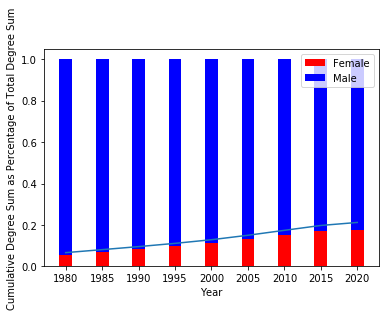

In [7]:
start = 1980
end = 2020
stacked_degree_fraction_over_year(edge_list, name_gender_map, start, end)


In [8]:
authors = pd.read_pickle('../data/authors.pkl')

In [9]:
authors

,author,number_publication
0,H. Vincent Poor,1202
1,Lajos Hanzo,820
2,Mohamed-Slim Alouini,794
3,Witold Pedrycz,704
4,Chin-Chen Chang 0001,638
...,...,...
1459838,Ünsal Özdogru,1
1459839,Ünsal Özkuvanci,1
1459840,Þröstur Pétursson,1
1459841,Þórhildur Þorleiksdóttir,1


In [10]:
students = authors[authors['number_publication'] < 7]
mentors = authors[authors['number_publication'] >= 7]

In [11]:
students

,author,number_publication
178355,A. A. Ball,6
178356,A. A. C. C. Pais,6
178357,A. A. J. Marley,6
178358,A. A. N. Perwira Redi,6
178359,A. Aminataei,6
...,...,...
1459838,Ünsal Özdogru,1
1459839,Ünsal Özkuvanci,1
1459840,Þröstur Pétursson,1
1459841,Þórhildur Þorleiksdóttir,1


In [12]:
edge_list = edge_list.loc[:, ~edge_list.columns.str.contains('^Unnamed')]
edge_list

,source,target,title,year,gender_source,gender_target
0,Alejandro P. Buchmann,Frank Manola,Object Data Model Facilities for Multimedia Da...,1990,male,male
1,Alejandro P. Buchmann,Mark F. Hornick,Object Data Model Facilities for Multimedia Da...,1990,male,male
2,Frank Manola,Mark F. Hornick,Object Data Model Facilities for Multimedia Da...,1990,male,male
3,Farshad Nayeri,Joe D. Morrison,"Integrating Heterogeneous, Autonomous, Distrib...",1991,male,male
4,Farshad Nayeri,Mark F. Hornick,"Integrating Heterogeneous, Autonomous, Distrib...",1991,male,male
...,...,...,...,...,...,...
6124131,Markus Casper,Oliver Gutjahr,Analysis of projected hydrological behavior of...,2012,male,male
6124132,Markus Casper,Rita Ley,Analysis of projected hydrological behavior of...,2012,male,female
6124133,Oliver Gronz,Oliver Gutjahr,Analysis of projected hydrological behavior of...,2012,male,male
6124134,Oliver Gronz,Rita Ley,Analysis of projected hydrological behavior of...,2012,male,female


In [13]:
student_map = {student: 'student' for student in students['author'].tolist()}
mentor_map = {mentor: 'mentor' for mentor in mentors['author'].tolist()}
category_map = {**student_map, **mentor_map}

In [14]:
edge_list['source_category'] = edge_list['source'].map(lambda x: category_map[x])
edge_list['target_category'] = edge_list['target'].map(lambda x: category_map[x])

edge_list

,source,target,title,year,gender_source,gender_target,source_category,target_category
0,Alejandro P. Buchmann,Frank Manola,Object Data Model Facilities for Multimedia Da...,1990,male,male,mentor,mentor
1,Alejandro P. Buchmann,Mark F. Hornick,Object Data Model Facilities for Multimedia Da...,1990,male,male,mentor,mentor
2,Frank Manola,Mark F. Hornick,Object Data Model Facilities for Multimedia Da...,1990,male,male,mentor,mentor
3,Farshad Nayeri,Joe D. Morrison,"Integrating Heterogeneous, Autonomous, Distrib...",1991,male,male,student,student
4,Farshad Nayeri,Mark F. Hornick,"Integrating Heterogeneous, Autonomous, Distrib...",1991,male,male,student,mentor
...,...,...,...,...,...,...,...,...
6124131,Markus Casper,Oliver Gutjahr,Analysis of projected hydrological behavior of...,2012,male,male,student,student
6124132,Markus Casper,Rita Ley,Analysis of projected hydrological behavior of...,2012,male,female,student,student
6124133,Oliver Gronz,Oliver Gutjahr,Analysis of projected hydrological behavior of...,2012,male,male,student,student
6124134,Oliver Gronz,Rita Ley,Analysis of projected hydrological behavior of...,2012,male,female,student,student


In [15]:
bipartite_edge_list = edge_list[edge_list['source_category'] != edge_list['target_category']]
bipartite_edge_list

,source,target,title,year,gender_source,gender_target,source_category,target_category
4,Farshad Nayeri,Mark F. Hornick,"Integrating Heterogeneous, Autonomous, Distrib...",1991,male,male,student,mentor
5,Joe D. Morrison,Mark F. Hornick,"Integrating Heterogeneous, Autonomous, Distrib...",1991,male,male,student,mentor
7,Frank Manola,Sandra Heiler,A 'RISC' Object Model for Object System Intero...,1993,male,female,mentor,student
14,Daniel Genkin,Paul Kocher,Meltdown,2018,male,male,mentor,student
16,Daniel Genkin,Thomas Prescher 0002,Meltdown,2018,male,male,mentor,student
...,...,...,...,...,...,...,...,...
6124099,Feetu Nyrhinen,Tommi Mikkonen,"Developing Client-Side Mashups: Experiences, G...",2013,male,male,student,mentor
6124100,Dmitri Botvich,Eamonn de Leastar,Scaling Instant Messaging Communication Servic...,2012,male,male,mentor,student
6124101,Dmitri Botvich,Kieran Ryan,Scaling Instant Messaging Communication Servic...,2012,male,male,mentor,student
6124103,Alan Hannaway,Mark Scanlon,Investigating Cybercrimes that Occur on Docume...,2011,male,male,student,mentor


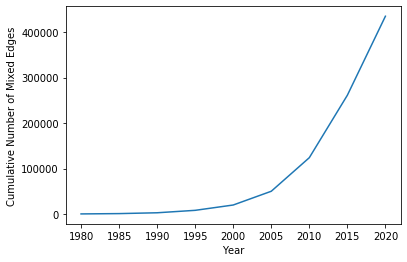

In [16]:
start = 1980
end = 2020
mixed_edges_over_year(bipartite_edge_list, start, end)

In [17]:
b = build_student_mentor_graph(edge_list, authors, name_gender_map, 7)

In [18]:
nx.write_gml(b, 'student_mentor_partial.gml')
